# Breast Cancer Prediction Analysis      

# Written by: N Mohan Teja       

# Date : 11 Febrauary 2021

# Purpose : Breast Cancer Prediction using Machine learning Models

# Steps that will be taken for ongoing Analysis    

Reading the dataset

Exploratory Data Analysis

Data Visualizations

Model Implementation

Model Predictions

Hyper Tunning the Machine Learning Model

Comparision of Models implemented

# Machine Learning Models using for dataset

KNeighbor Classifier Model

Decision Tree Classifier Model

Random Forest Classifier Model

Gradient Boosting classifier Model

# Attributes Information

y has value 0 or 1 in the dataset

radius
      - mean of distances from center to points on the perimeter
texture
      -Standard Deviation of gray scale values
Perimeter

Area

Smoothness - local variation in radius length

Compactness - perimeter^2/area - 1.0

Concavity - severity of concave portions of the contour

concave points -number of concave portions of the contour

symmetry

fractal dimension

# Loading the Required Python Liabraries

In [1]:
# Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
import warnings

warnings.filterwarnings('ignore') #ignore warning messages 

# Loading the classical Breast Cancer dataset

In [2]:
from sklearn.datasets import load_breast_cancer
data = pd.DataFrame(load_breast_cancer()['data'],
columns=load_breast_cancer()['feature_names'])
data['y'] = load_breast_cancer()['target']


In [3]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:


pd.options.display.max_columns = None
pd.options.display.max_rows = 80




# Exploring Data Anaysis

In [5]:
# describe
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
data.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
data.isna()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Finding the Missing Values

In [10]:
missing_values=data.isnull().sum()
percent_missing = data.isnull().sum()/data.shape[0]*100

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
mean radius,0,0.0
mean texture,0,0.0
mean perimeter,0,0.0
mean area,0,0.0
mean smoothness,0,0.0
mean compactness,0,0.0
mean concavity,0,0.0
mean concave points,0,0.0
mean symmetry,0,0.0
mean fractal dimension,0,0.0


In [11]:
data.isna().any()

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
y         

In [12]:
data.isna().sum() 

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
y                          0
dtype: int64

In [13]:
data = data.dropna(axis='columns')

In [14]:
data.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


In [15]:
data.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

# Data Visualization

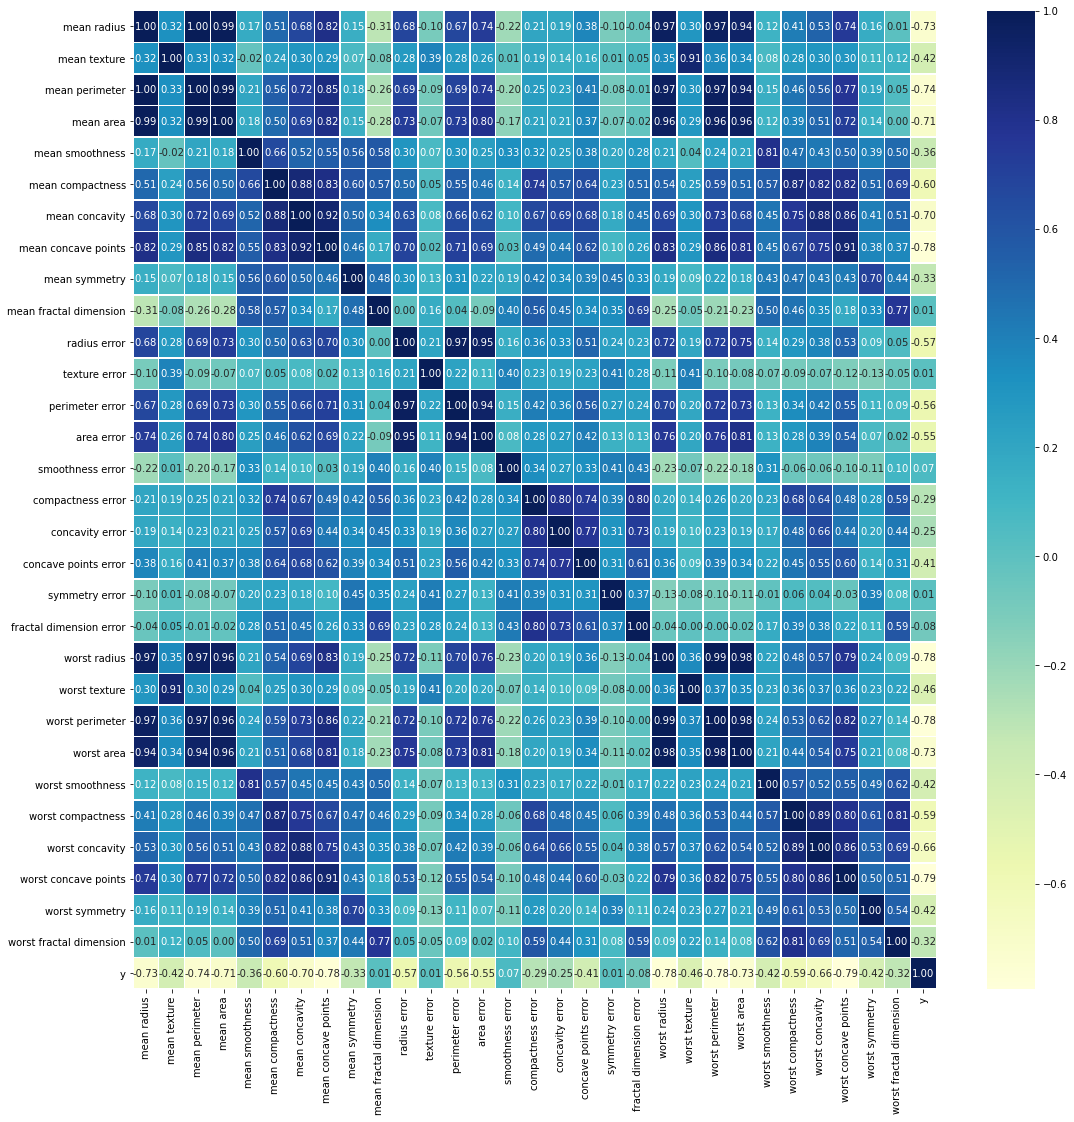

In [16]:
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax,cmap="YlGnBu")
plt.show()

# Column y in dataset

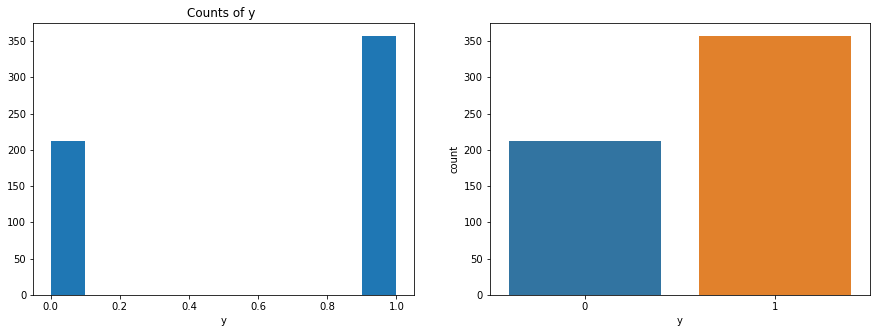

In [17]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist( data.y)

plt.title("Counts of y ")
plt.xlabel("y")


plt.subplot(1, 2, 2)

sns.countplot('y', data=data); # ";" to remove output like this > <matplotlib.axes._subplots.AxesSubplot at 0x7f3a1dddba50>



# Correlation between mean radius, worst radius and worst area

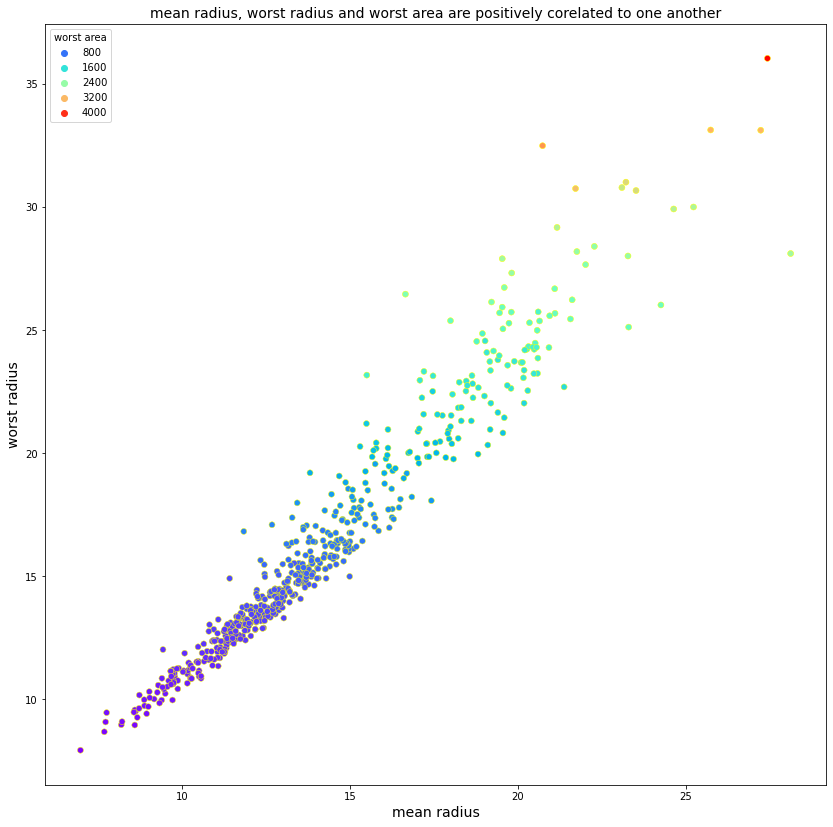

In [18]:
plt.figure(figsize=(14,14))
k=sns.scatterplot(data["mean radius"],data["worst radius"], hue=data["worst area"],palette="rainbow",edgecolor='yellow')
plt.xlabel("mean radius",fontsize=14)
plt.ylabel("worst radius",fontsize=14)
plt.title("mean radius, worst radius and worst area are positively corelated to one another",fontsize=14)
plt.show()

# Scatter plot

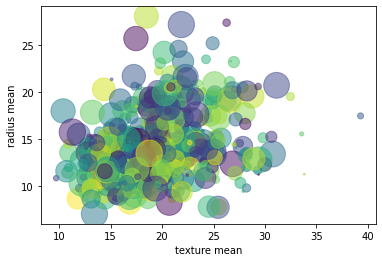

In [19]:
size = len(data['mean texture'])

area = np.pi * (15 * np.random.rand( size ))**2
colors = np.random.rand( size )

plt.xlabel("texture mean")
plt.ylabel("radius mean") 
plt.scatter(data['mean texture'], data['mean radius'], s=area, c=colors, alpha=0.5)


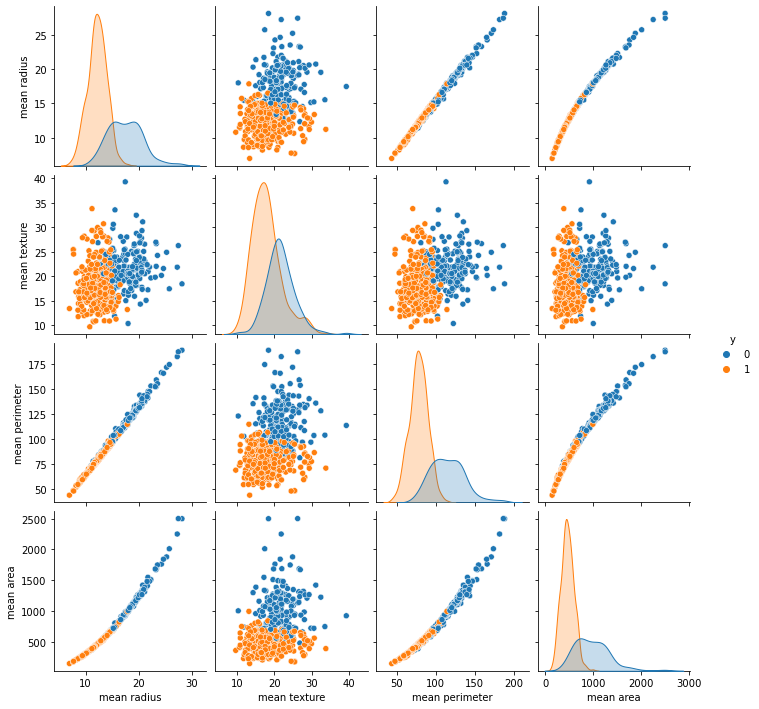

In [20]:
cols = [ "y","mean radius", "mean texture", "mean perimeter", "mean area"]

sns.pairplot(data[cols],hue="y")
plt.show()

# Correlation between mean radius and mean fractal dimension

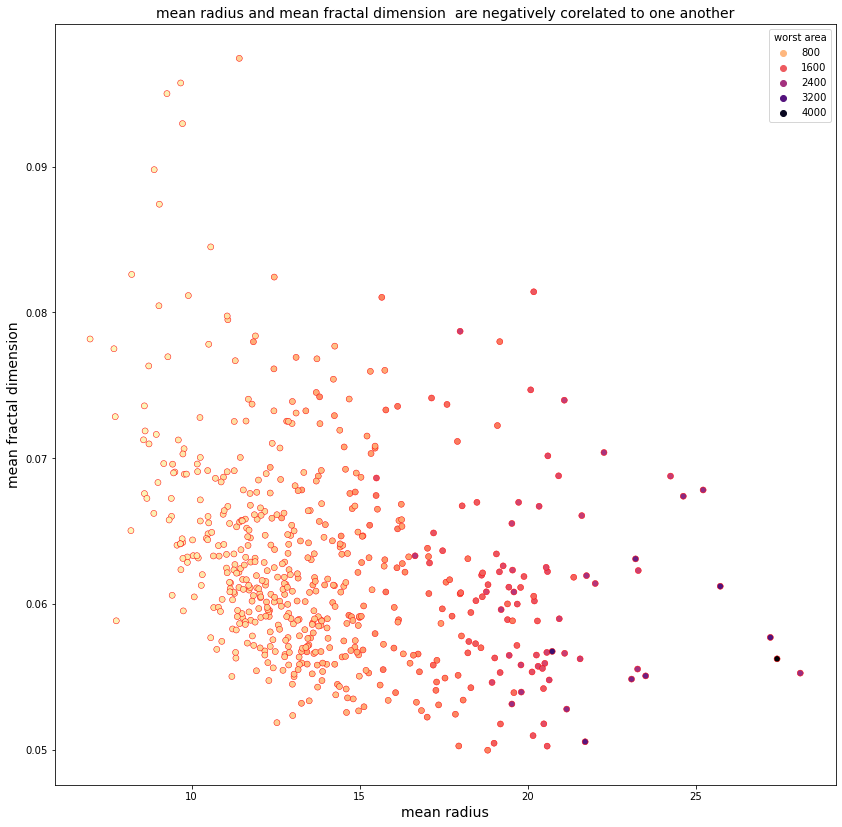

In [21]:
plt.figure(figsize=(14,14))
l=sns.scatterplot(data["mean radius"],data["mean fractal dimension"], hue=data["worst area"],palette="magma_r",edgecolor='red')
plt.xlabel("mean radius",fontsize=14)
plt.ylabel("mean fractal dimension",fontsize=14)
plt.title("mean radius and mean fractal dimension  are negatively corelated to one another",fontsize=14)
plt.show()


<Figure size 1008x720 with 0 Axes>

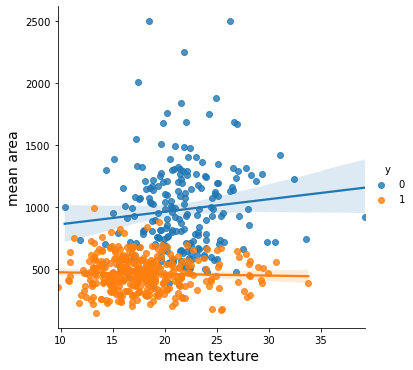

In [23]:
plt.figure(figsize=(14,10))
l2=sns.lmplot("mean texture","mean area",hue="y", data=data)
plt.xlabel("mean texture",fontsize=14)
plt.ylabel("mean area",fontsize=14)
plt.show()

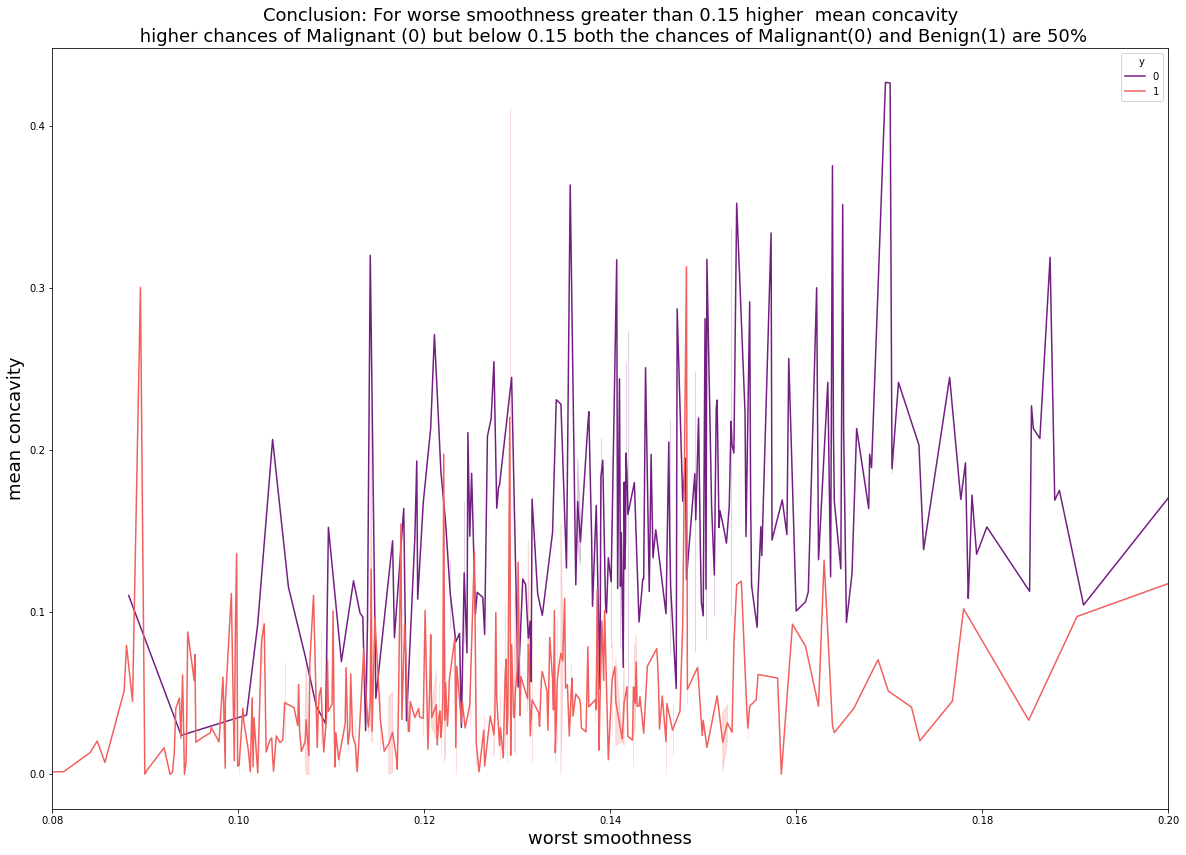

In [24]:
plt.figure(figsize=(20,14))
l=sns.lineplot(data["worst smoothness"],data["mean concavity"],hue=data["y"],palette="magma",)#palette="magma_r",edgecolor='red')
plt.xlabel("worst smoothness",fontsize=18)
plt.ylabel("mean concavity",fontsize=18)
plt.xlim([0.08,0.20])
plt.title("Conclusion: For worse smoothness greater than 0.15 higher  mean concavity\n higher chances of Malignant (0) but below 0.15 both the chances of Malignant(0) and Benign(1) are 50%",fontsize=18)
plt.show()


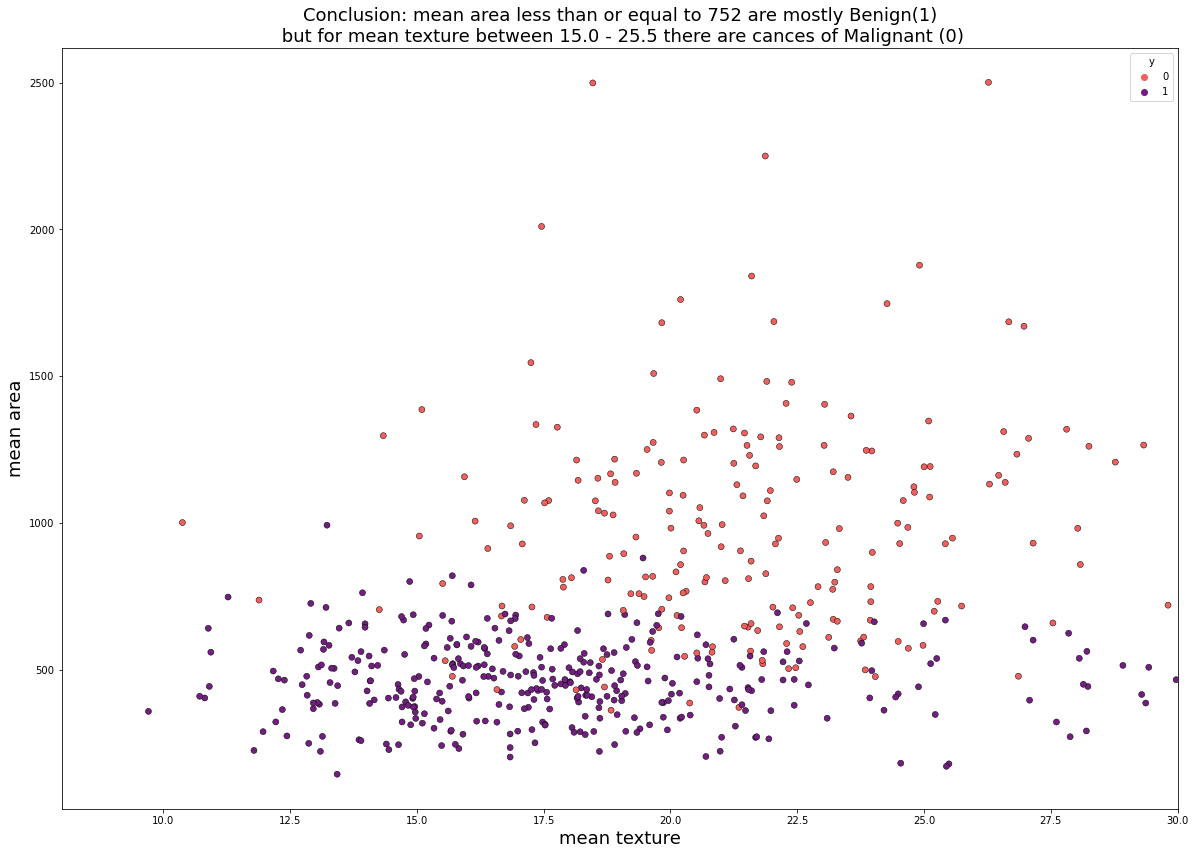

In [25]:
plt.figure(figsize=(20,14))
l=sns.scatterplot(data["mean texture"],data["mean area"],hue=data["y"],palette="magma_r",edgecolor='black')#palette="magma_r",edgecolor='red')
plt.xlabel("mean texture",fontsize=18)
plt.ylabel("mean area",fontsize=18)
plt.xlim([8,30])
plt.title("Conclusion: mean area less than or equal to 752 are mostly Benign(1)\n but for mean texture between 15.0 - 25.5 there are cances of Malignant (0)",fontsize=18)
plt.show()


# Worst Concave Points

<AxesSubplot:xlabel='worst concave points'>

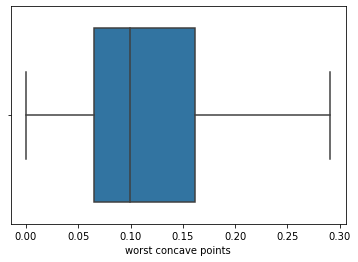

In [26]:
sns.boxplot(x=data['worst concave points'])

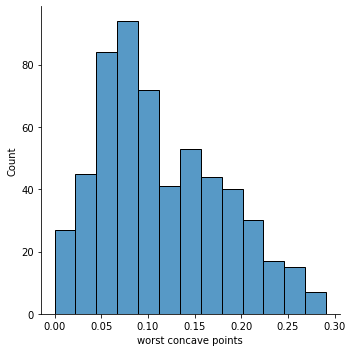

In [27]:
sns.displot(data, x='worst concave points')

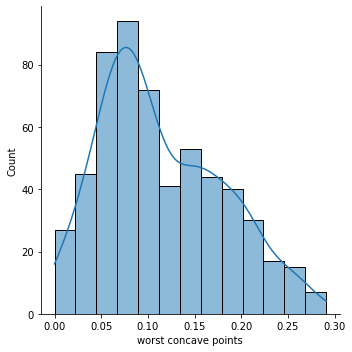

In [28]:
sns.displot(data, x="worst concave points", kde=True)

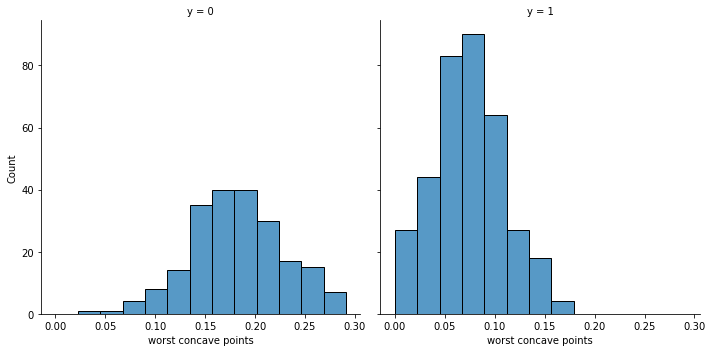

In [29]:
sns.displot(data, x="worst concave points", col="y", multiple="dodge")

# Mean Concavity

<AxesSubplot:xlabel='mean concavity'>

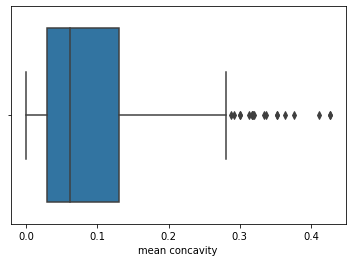

In [30]:
sns.boxplot(x=data['mean concavity'])

In [31]:
out=data[data['mean concavity']>=0.25]
out

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.990,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.2654,0.4601,0.11890,0
68,9.029,17.33,58.79,250.5,0.10660,0.1413,0.3130,0.04375,0.2111,0.08046,0.3274,1.1940,1.885,17.67,0.009549,0.08606,0.30380,0.03322,0.04197,0.009559,10.31,22.65,65.50,324.7,0.14820,0.4365,1.2520,0.1750,0.4228,0.11750,1
78,20.180,23.97,143.70,1245.0,0.12860,0.3454,0.3754,0.16040,0.2906,0.08142,0.9317,1.8850,8.649,116.40,0.010380,0.06835,0.10910,0.02593,0.07895,0.005987,23.37,31.72,170.30,1623.0,0.16390,0.6164,0.7681,0.2508,0.5440,0.09964,0
82,25.220,24.91,171.50,1878.0,0.10630,0.2665,0.3339,0.18450,0.1829,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.05693,0.05730,0.02030,0.01065,0.005893,30.00,33.62,211.70,2562.0,0.15730,0.6076,0.6476,0.2867,0.2355,0.10510,0
108,22.270,19.67,152.80,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,0.07039,1.2150,1.5450,10.050,170.00,0.006515,0.08668,0.10400,0.02480,0.03112,0.005037,28.40,28.01,206.80,2360.0,0.17010,0.6997,0.9608,0.2910,0.4055,0.09789,0
112,14.260,19.65,97.83,629.9,0.07837,0.2233,0.3003,0.07798,0.1704,0.07769,0.3628,1.4900,3.399,29.25,0.005298,0.07446,0.14350,0.02292,0.02566,0.012980,15.30,23.73,107.00,709.0,0.08949,0.4193,0.6783,0.1505,0.2398,0.10820,1
122,24.250,20.20,166.20,1761.0,0.14470,0.2867,0.4268,0.20120,0.2655,0.06877,1.5090,3.1200,9.807,233.00,0.023330,0.09806,0.12780,0.01822,0.04547,0.009875,26.02,23.99,180.90,2073.0,0.16960,0.4244,0.5803,0.2248,0.3222,0.08009,0
129,19.790,25.12,130.40,1192.0,0.10150,0.1589,0.2545,0.11490,0.2202,0.06113,0.4953,1.1990,2.765,63.33,0.005033,0.03179,0.04755,0.01043,0.01578,0.003224,22.63,33.58,148.70,1589.0,0.12750,0.3861,0.5673,0.1732,0.3305,0.08465,0
152,9.731,15.34,63.78,300.2,0.10720,0.1599,0.4108,0.07857,0.2548,0.09296,0.8245,2.6640,4.073,49.85,0.010970,0.09586,0.39600,0.05279,0.03546,0.029840,11.02,19.49,71.04,380.5,0.12920,0.2772,0.8216,0.1571,0.3108,0.12590,1
162,19.590,18.15,130.70,1214.0,0.11200,0.1666,0.2508,0.12860,0.2027,0.06082,0.7364,1.0480,4.792,97.07,0.004057,0.02277,0.04029,0.01303,0.01686,0.003318,26.73,26.39,174.90,2232.0,0.14380,0.3846,0.6810,0.2247,0.3643,0.09223,0


In [32]:
Data= data[data['mean concavity']<0.25]
Data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.013080,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.03672,0.01137,0.02165,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,0.3141,3.8960,2.041,22.81,0.007594,0.008878,0.00000,0.00000,0.01989,0.001773,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905,1
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.028910,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.024230,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.037310,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0


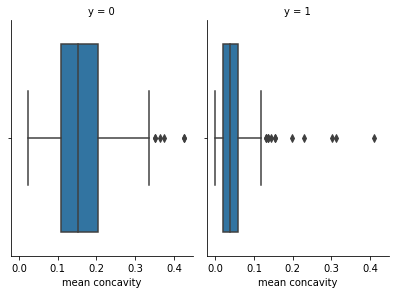

In [33]:
sns.catplot(x="mean concavity", data=data,col="y", kind="box",  height=4, aspect=.7)

# Worst Perimeter

<AxesSubplot:xlabel='worst perimeter'>

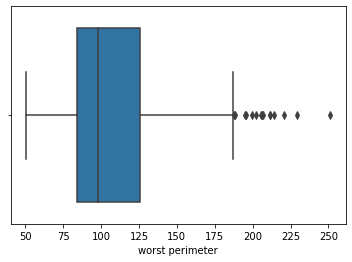

In [34]:
sns.boxplot(x=data['worst perimeter'])

In [35]:
out=data[data['worst perimeter']>=165]
out

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
18,19.81,22.15,130.0,1260.0,0.09831,0.10270,0.1479,0.09498,0.1582,0.05395,0.7582,1.0170,5.865,112.40,0.006494,0.01893,0.03391,0.01521,0.01356,0.001997,27.32,30.88,186.8,2398.0,0.1512,0.3150,0.5372,0.2388,0.2768,0.07615,0
23,21.16,23.04,137.2,1404.0,0.09428,0.10220,0.1097,0.08632,0.1769,0.05278,0.6917,1.1270,4.303,93.99,0.004728,0.01259,0.01715,0.01038,0.01083,0.001987,29.17,35.59,188.0,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526,0
24,16.65,21.38,110.0,904.6,0.11210,0.14570,0.1525,0.09170,0.1995,0.06330,0.8068,0.9017,5.455,102.60,0.006048,0.01882,0.02741,0.01130,0.01468,0.002801,26.46,31.56,177.0,2215.0,0.1805,0.3578,0.4695,0.2095,0.3613,0.09564,0
42,19.07,24.81,128.3,1104.0,0.09081,0.21900,0.2107,0.09961,0.2310,0.06343,0.9811,1.6660,8.830,104.90,0.006548,0.10060,0.09723,0.02638,0.05333,0.007646,24.09,33.17,177.4,1651.0,0.1247,0.7444,0.7242,0.2493,0.4670,0.10380,0
56,19.21,18.57,125.5,1152.0,0.10530,0.12670,0.1323,0.08994,0.1917,0.05961,0.7275,1.1930,4.837,102.50,0.006458,0.02306,0.02945,0.01538,0.01852,0.002608,26.14,28.14,170.1,2145.0,0.1624,0.3511,0.3879,0.2091,0.3537,0.08294,0
70,18.94,21.31,123.6,1130.0,0.09009,0.10290,0.1080,0.07951,0.1582,0.05461,0.7888,0.7975,5.486,96.05,0.004444,0.01652,0.02269,0.01370,0.01386,0.001698,24.86,26.58,165.9,1866.0,0.1193,0.2336,0.2687,0.1789,0.2551,0.06589,0
78,20.18,23.97,143.7,1245.0,0.12860,0.34540,0.3754,0.16040,0.2906,0.08142,0.9317,1.8850,8.649,116.40,0.010380,0.06835,0.10910,0.02593,0.07895,0.005987,23.37,31.72,170.3,1623.0,0.1639,0.6164,0.7681,0.2508,0.5440,0.09964,0
82,25.22,24.91,171.5,1878.0,0.10630,0.26650,0.3339,0.18450,0.1829,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.05693,0.05730,0.02030,0.01065,0.005893,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510,0
108,22.27,19.67,152.8,1509.0,0.13260,0.27680,0.4264,0.18230,0.2556,0.07039,1.2150,1.5450,10.050,170.00,0.006515,0.08668,0.10400,0.02480,0.03112,0.005037,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789,0


In [36]:
Data = data[data['worst perimeter']<165]
Data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.013080,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.03672,0.01137,0.02165,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,0.3141,3.8960,2.041,22.81,0.007594,0.008878,0.00000,0.00000,0.01989,0.001773,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905,1
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,0.2602,1.2050,2.362,22.65,0.004625,0.048440,0.07359,0.01608,0.02137,0.006142,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.2356,0.4089,0.14090,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.024230,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.037310,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0


<AxesSubplot:xlabel='worst perimeter'>

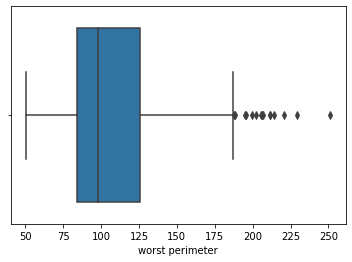

In [37]:
sns.boxplot(x=data['worst perimeter'])

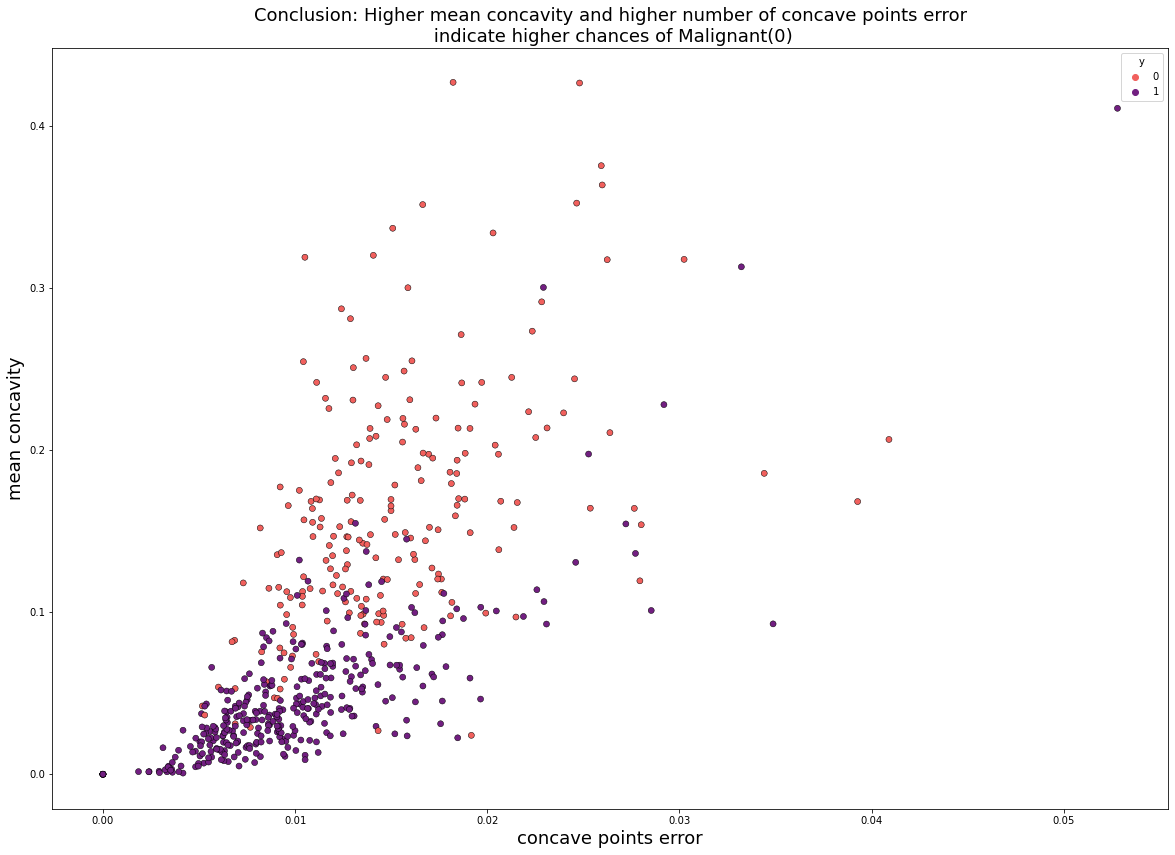

In [38]:
plt.figure(figsize=(20,14))
l=sns.scatterplot(data["concave points error"],data["mean concavity"],hue=data["y"], palette="magma_r",edgecolor='black')#palette="magma_r",edgecolor='red')
plt.ylabel("mean concavity",fontsize=18)
plt.xlabel("concave points error",fontsize=18)
plt.title("Conclusion: Higher mean concavity and higher number of concave points error\n indicate higher chances of Malignant(0)",fontsize=18)
plt.show()


# Correlation Graph

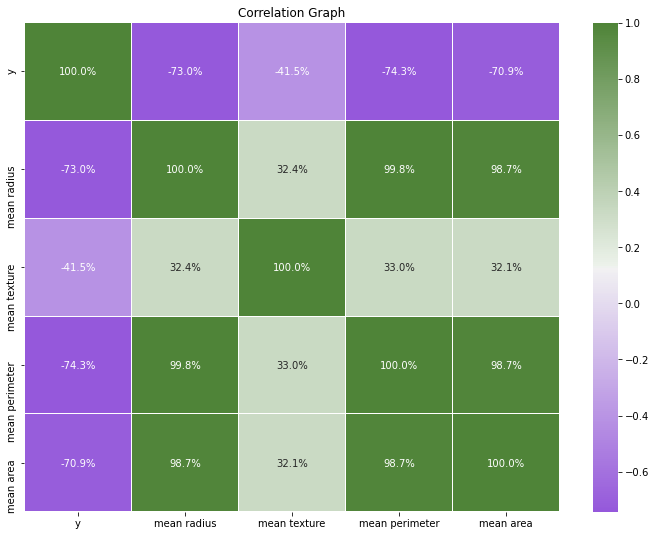

In [39]:
plt.figure(figsize=(12, 9))

plt.title("Correlation Graph")

cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(data[cols].corr(), annot=True, fmt='.1%',  linewidths=.05, cmap=cmap);

In [40]:
cols = [ 'mean radius', 'mean texture', 'mean perimeter',
       'mean area', 'mean smoothness', 'mean compactness', 'mean concavity',
       'concave points error', 'mean symmetry', 'mean fractal dimension','y']
print(len(cols))
data[cols].corr()


11


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,concave points error,mean symmetry,mean fractal dimension,y
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.376169,0.147741,-0.311631,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.163851,0.071401,-0.076437,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.407217,0.183027,-0.261477,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.372320,0.151293,-0.283110,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.380676,0.557775,0.584792,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.642262,0.602641,0.565369,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.683260,0.500667,0.336783,-0.696360
concave points error,0.376169,0.163851,0.407217,0.372320,0.380676,0.642262,0.683260,1.000000,0.393298,0.341198,-0.408042
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.393298,1.000000,0.479921,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.341198,0.479921,1.000000,0.012838


# Correlation Map for dataset

In [41]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
mean radius,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,0.68,-0.10,0.67,0.74,-0.22,0.21,0.19,0.38,-0.10,-0.04,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01,-0.73
mean texture,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,0.28,0.39,0.28,0.26,0.01,0.19,0.14,0.16,0.01,0.05,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12,-0.42
mean perimeter,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,0.69,-0.09,0.69,0.74,-0.20,0.25,0.23,0.41,-0.08,-0.01,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05,-0.74
mean area,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,0.73,-0.07,0.73,0.80,-0.17,0.21,0.21,0.37,-0.07,-0.02,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00,-0.71
mean smoothness,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,0.30,0.07,0.30,0.25,0.33,0.32,0.25,0.38,0.20,0.28,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50,-0.36
mean compactness,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.57,0.50,0.05,0.55,0.46,0.14,0.74,0.57,0.64,0.23,0.51,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69,-0.60
mean concavity,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34,0.63,0.08,0.66,0.62,0.10,0.67,0.69,0.68,0.18,0.45,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51,-0.70
mean concave points,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17,0.70,0.02,0.71,0.69,0.03,0.49,0.44,0.62,0.10,0.26,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37,-0.78
mean symmetry,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,0.48,0.30,0.13,0.31,0.22,0.19,0.42,0.34,0.39,0.45,0.33,0.19,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44,-0.33
mean fractal dimension,-0.31,-0.08,-0.26,-0.28,0.58,0.57,0.34,0.17,0.48,1.00,0.00,0.16,0.04,-0.09,0.40,0.56,0.45,0.34,0.35,0.69,-0.25,-0.05,-0.21,-0.23,0.50,0.46,0.35,0.18,0.33,0.77,0.01


# Model Implementation

# Test Train Splitting

Preprocessing and Model Selection

In [42]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

# Importing Machine Learning Model

In [43]:


from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

# Libraries for checking Accuracy and validation

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.metrics import classification_report

from sklearn import metrics

# Feature Selection

In [45]:
data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'y'],
      dtype='object')

In [46]:
prediction_feature = [ "mean radius",  'mean perimeter', 'mean area', 'mean symmetry', 'mean compactness', 'concave points error']



len(prediction_feature)



6

In [47]:
X = data[prediction_feature]
X

,mean radius,mean perimeter,mean area,mean symmetry,mean compactness,concave points error
0,17.99,122.80,1001.0,0.2419,0.27760,0.01587
1,20.57,132.90,1326.0,0.1812,0.07864,0.01340
2,19.69,130.00,1203.0,0.2069,0.15990,0.02058
3,11.42,77.58,386.1,0.2597,0.28390,0.01867
4,20.29,135.10,1297.0,0.1809,0.13280,0.01885
...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.1726,0.11590,0.02454
565,20.13,131.20,1261.0,0.1752,0.10340,0.01678
566,16.60,108.30,858.1,0.1590,0.10230,0.01557
567,20.60,140.10,1265.0,0.2397,0.27700,0.01664


In [48]:
Y= data.y
Y


0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: y, Length: 569, dtype: int64

# Split the dataset into TrainingSet and TestingSet by 33% and set the 15 fixed records

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=15)

print(X_train)

     mean radius  mean perimeter  mean area  mean symmetry  mean compactness  \
274        17.93          115.20      998.9         0.1538           0.07027   
189        12.30           78.83      463.7         0.1667           0.07253   
158        12.06           76.84      448.6         0.1590           0.05241   
257        15.32          103.20      713.3         0.2398           0.22840   
486        14.64           94.21      666.0         0.1409           0.06698   
..           ...             ...        ...            ...               ...   
85         18.46          121.10     1075.0         0.2132           0.10530   
199        14.45           94.49      642.7         0.1950           0.12060   
156        17.68          117.40      963.7         0.1971           0.16650   
384        13.28           85.79      541.8         0.1617           0.08575   
456        11.63           74.87      415.1         0.1799           0.08574   

     concave points error  
274        

# Feature Scaling

In [50]:

# Scale the data to keep all the values in the same magnitude of 0 -1 

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# KNeighbor Classifier Model

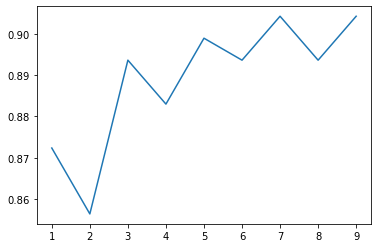

In [53]:

list1 = []
for neighbors in range(1,10):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    list1.append(accuracy_score(Y_test,Y_pred))
plt.plot(list(range(1,10)), list1)
plt.show()

# Predicting the Test set

In [54]:
# Training the K Nearest Neighbor Classifier on the Training set

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, Y_train)

# Predicting the Test set results

Y_pred = classifier.predict(X_test)
print(Y_pred)


[1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1
 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1
 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1
 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0
 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0
 1 1 0]


# Getting Accuracy

In [56]:
# Making the confusion matrix and calculating accuracy score

mylist = []
cm = confusion_matrix(Y_test, Y_pred)
acc_knn = accuracy_score(Y_test, Y_pred)
mylist.append(acc_knn)
print("Confusion Matrix is \n",cm)
print("Accuracy score is ",acc_knn)

Confusion Matrix is 
 [[ 61  12]
 [  8 107]]
Accuracy score is  0.8936170212765957


# Decision Tree Classifier Model

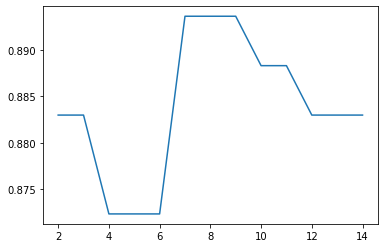

In [57]:

# Finding the optimum number of max_leaf_nodes

list1 = []
for leaves in range(2,15):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    list1.append(accuracy_score(Y_test,Y_pred))
plt.plot(list(range(2,15)), list1)
plt.show()

In [58]:

# Training the Decision Tree Classifier on the Training set

classifier = DecisionTreeClassifier(max_leaf_nodes = 5, random_state=0, criterion='entropy')
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, random_state=0)

# Predicting Test set

In [59]:
#Predicting the test set results

Y_pred = classifier.predict(X_test)
print(Y_pred)

[1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1
 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1
 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0
 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0
 1 1 1]


# Getting Accuracy

In [60]:

# Making the confusion matrix and calculating accuracy score

cm = confusion_matrix(Y_test, Y_pred)
acc_decisiontree = accuracy_score(Y_test, Y_pred)
print("confusion matrix is\n ",cm)
print("Accuracy score is ",acc_decisiontree)
mylist.append(acc_decisiontree)

confusion matrix is
  [[ 63  10]
 [ 14 101]]
Accuracy score is  0.8723404255319149


# Random Forest Classifier Model

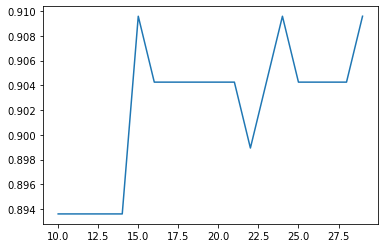

In [62]:
#Finding the optimum number of n_estimators


list1 = []
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    list1.append(accuracy_score(Y_test,Y_pred))

plt.plot(list(range(10,30)), list1)
plt.show()

In [63]:
# Training the RandomForest Classifier on the Training set

classifier = RandomForestClassifier(n_estimators = 15, criterion='entropy', random_state=0)
classifier.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=0)

# Predicting the test set

In [64]:

# Predicting the test set results

Y_pred = classifier.predict(X_test)
print(Y_pred)

[1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1
 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1
 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1
 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0
 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0
 1 1 0]


# Getting the Accuracy

In [65]:
# Making the confusion matrix and calculating the accuracy score

cm = confusion_matrix(Y_test, Y_pred)
acc_randomforest = accuracy_score(Y_test, Y_pred)
mylist.append(acc_randomforest)
print("Confusion Matrix is \n",cm)
print("Accuracy score is ",acc_randomforest)

Confusion Matrix is 
 [[ 62  11]
 [  6 109]]
Accuracy score is  0.9095744680851063


# Importing libraries required for Gradient Boosting Classifier

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,auc,roc_curve

# Gradient Boosting Classifier

In [67]:
Model = GradientBoostingClassifier(verbose=1, learning_rate=0.4,warm_start=True)
Model.fit(X_train, Y_train)

      Iter       Train Loss   Remaining Time 
         1           0.8028            0.30s
         2           0.5791            0.22s
         3           0.4554            0.18s
         4           0.3703            0.17s
         5           0.3127            0.16s
         6           0.2815            0.15s
         7           0.2498            0.15s
         8           0.2181            0.14s
         9           0.1951            0.14s
        10           0.1638            0.14s
        20           0.0657            0.11s
        30           0.0357            0.09s
        40           0.0192            0.07s
        50           0.0111            0.06s
        60           0.0066            0.05s
        70           0.0039            0.04s
        80           0.0024            0.02s
        90           0.0015            0.01s
       100           0.0009            0.00s


GradientBoostingClassifier(learning_rate=0.4, verbose=1, warm_start=True)

# Getting Accuracy

In [68]:
Y_pred = Model.predict(X_test)
acc_gbc= accuracy_score(Y_test,Y_pred)
print("Accuracy\t:"+str(accuracy_score(Y_test,Y_pred)))
print("Precision\t:"+str(precision_score(Y_test,Y_pred)))
print("Recall\t:"+str(recall_score(Y_test,Y_pred)))



Accuracy	:0.8776595744680851
Precision	:0.896551724137931
Recall	:0.9043478260869565


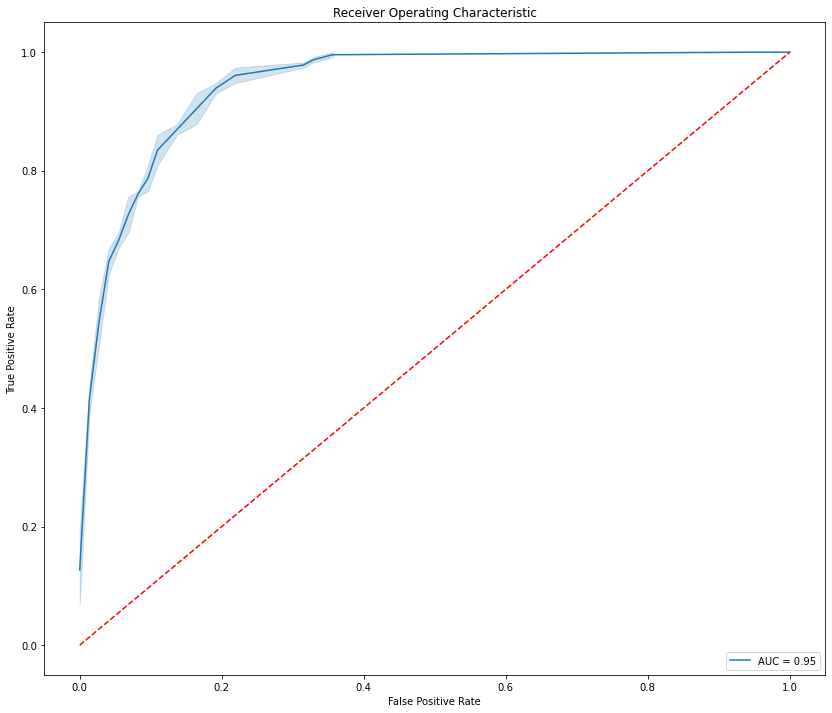

In [69]:
prob=Model.predict_proba(X_test)
prob = prob[:,1]
fpr,tpr,_ = roc_curve(Y_test, prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(14,12))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Hyper Tunning the parameters for Decision Tree Classifier

In [70]:
from  sklearn.model_selection import GridSearchCV

For HyperTunning we can use GridSearchCV to know the best performing parameters

 GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

# Implementation 

In [71]:
# Let's Implement Grid Search Algorithm

# Pick the model
model = DecisionTreeClassifier()

# Tunning Paramaters
param_grid = {'criterion': ["gini", "entropy"],
              'max_depth': [10,20,50,100], 
              'min_samples_leaf':[10,20,50] }

# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10) # For 10 Cross-Validation

gsc.fit(X_train, Y_train) # Model Fitting

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estimator is ")
print(gsc.best_estimator_)

print("\n Best Parameters are")
print(gsc.best_params_)


 Best Score is 
0.902834008097166

 Best Estimator is 
DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)

 Best Parameters are
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10}


# Defining Confusion Metric Graph 

In [72]:
# Let's Define the function for confision metric Graphs

def cm_metrix_graph(cm):
    
    sns.heatmap(cm,annot=True,fmt="d")
    plt.show()

# Model Building 

In [73]:
def model_building(model, X_train, X_test, Y_train, Y_test):
    """
    
    Model Fitting, Prediction And Other stuff
    return ('score', 'accuracy_score', 'predictions' )
    """
    
    model.fit(X_train, Y_train)
    score = model.score(X_train, Y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(predictions, Y_test)
    
    return (score, accuracy, predictions)    

# Summary of Four models implemented

In [75]:
models_list = {
    "RandomForestClassifier" :  RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=5),
    "DecisionTreeClassifier" :  DecisionTreeClassifier(criterion='entropy', random_state=0),
    "KNeighborsClassifier"   :  KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski'),
"GradientBoostingClassifier"  :  GradientBoostingClassifier(verbose=1, learning_rate=0.4,warm_start=True)
}



In [77]:
print(list(models_list.keys()))
print(list(models_list.values()))

['RandomForestClassifier', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'GradientBoostingClassifier']
[RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=5), DecisionTreeClassifier(criterion='entropy', random_state=0), KNeighborsClassifier(n_neighbors=9), GradientBoostingClassifier(learning_rate=0.4, verbose=1, warm_start=True)]


# Classification Report of Four Models

In [79]:
df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]

for name, model in zip(list(models_list.keys()), list(models_list.values())):
    
    (score, accuracy, predictions) = model_building(model, X_train, X_test, Y_train, Y_test )
    
    print("\n\nClassification Report of '"+ str(name), "'\n")
    
    print(classification_report(Y_test, predictions))

    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])
    
    # For Showing Metrics
    
    confusion_matrixs.append(confusion_matrix(Y_test, predictions))
    
        
df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)



Classification Report of 'RandomForestClassifier '

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        73
           1       0.89      0.94      0.92       115

    accuracy                           0.89       188
   macro avg       0.89      0.88      0.89       188
weighted avg       0.89      0.89      0.89       188



Classification Report of 'DecisionTreeClassifier '

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        73
           1       0.89      0.91      0.90       115

    accuracy                           0.88       188
   macro avg       0.87      0.87      0.87       188
weighted avg       0.88      0.88      0.88       188



Classification Report of 'KNeighborsClassifier '

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        73
           1       0.89      0.97      0.92       115

    accuracy          

In [80]:
print(len(confusion_matrixs))

4


# Confusion Metric Graph

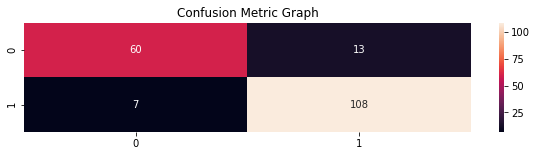

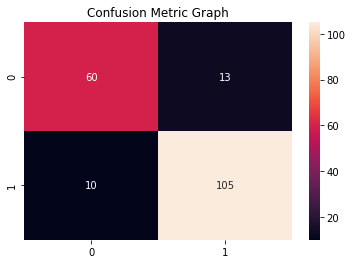

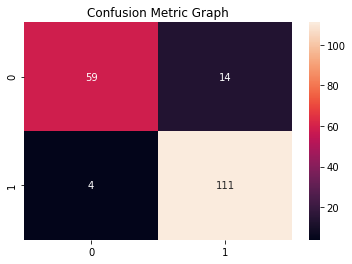

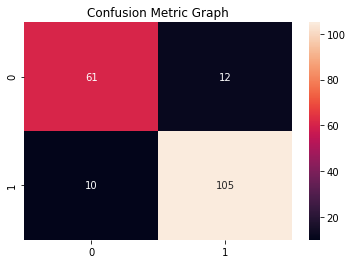

<Figure size 432x288 with 0 Axes>

In [81]:
plt.figure(figsize=(10, 2))
plt.title("Confusion Metric Graph")
for index, cm in enumerate(confusion_matrixs):
    plt.title("Confusion Metric Graph")
    cm_metrix_graph(cm) # Calling the Confusion Metrics Graph
    plt.tight_layout(pad=True)

# Summarizing the models

In [82]:
df_pred 

,model_name,score,accuracy_score,accuracy_percentage
0,RandomForestClassifier,0.994751,0.893617,89.36%
1,DecisionTreeClassifier,1.000000,0.877660,87.77%
2,KNeighborsClassifier,0.934383,0.904255,90.43%
3,GradientBoostingClassifier,1.000000,0.882979,88.30%


In [83]:
df_pred.sort_values('score', ascending=False)

,model_name,score,accuracy_score,accuracy_percentage
1,DecisionTreeClassifier,1.000000,0.877660,87.77%
3,GradientBoostingClassifier,1.000000,0.882979,88.30%
0,RandomForestClassifier,0.994751,0.893617,89.36%
2,KNeighborsClassifier,0.934383,0.904255,90.43%


In [84]:
models = pd.DataFrame({
    'Model': [ 'KNeighbour','Random Forest','Decision Tree','GradientBoosting'],
    'Accuracy': [ acc_knn,acc_randomforest,acc_decisiontree,acc_gbc
              ]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,Random Forest,0.909574
0,KNeighbour,0.893617
3,GradientBoosting,0.877660
2,Decision Tree,0.872340


# Comparing the Four Models

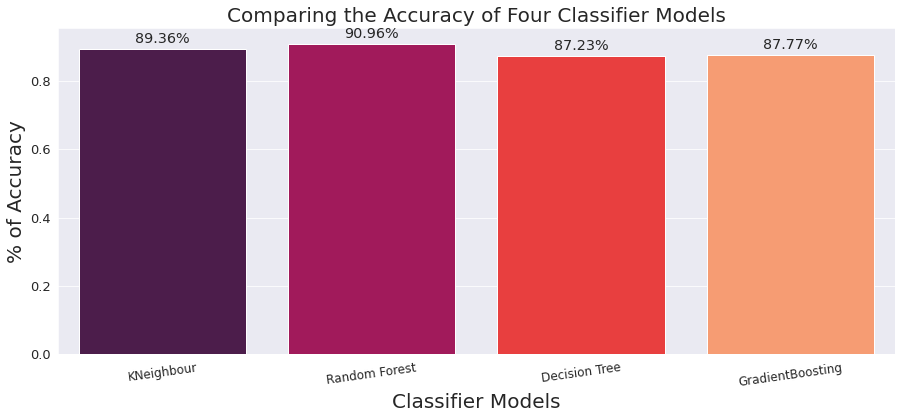

In [86]:
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=models.Model, y=models.Accuracy, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Comparing the Accuracy of Four Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

# The End 